In [1]:
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
import matplotlib.pyplot as plt

In [3]:
heart_df = pd.read_csv('data/cardio_train.csv', sep=';')
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dfSummary(heart_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 49972.4 (28851.3)min < med < max:0.0 < 50001.5 < 99999.0IQR (CV) : 49882.5 (1.7),"70,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACQUlEQVR4nO3XO4/aQBSG4TOwQcMltrgEOpqU6SzR0KRLmR+bNj1IqSnSpKJBSMgY4SwKIk6RbJld7NnF+0nvU3OYw/gFCVcUhQGvXaPuBYBr3NW9wGvlnGubWavi+K+iKO5rONfs74/P74qzlfd+aU+GGnhxIZcWOh8y6weDwac4jrtVhvf7/dE599XMTrc893K5vMnz/H2v1/vRaDTOZecD9n7wYl+SR0N1zrWHw+HnKIr6ZU8NvbSQ+dCzz+ezN7MPs9ns22g0OpSZ3Ww2b5fL5cfpdDpqNpulHnjIuWZm6/W6v1qt3iVJ8n0ymaRlZkP2Ngu/88PhkDrnvvwv1qd+UVtRFPXn8/l9HMellg+5tND5Zzq7470/j8fjn2Vm0zRte+87SZKcKu5d6dyHs83Mut3u6ZZ7m4XdeZZlfrFY9He7XcvMKoVqZmZxHFf64GbVLi10/rnODhGyd53qeF7/PPrZ+dcPCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCXfXvCjLMl/2jY/Hozczy/Pcb7fbzi3nVc9W3Tt0/pq+/gA8yTXiDKXm6gAAAABJRU5ErkJggg=="">",0(0.0%)
2,age[int64],Mean (sd) : 19468.9 (2467.3)min < med < max:10798.0 < 19703.0 < 23713.0IQR (CV) : 3663.0 (7.9),"8,076 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACk0lEQVR4nO3dPY7aQBiA4W/CTwwothARdL5ApBSUNLlBDps2XYrlAtyABiEhY4SzFsZ2iiQSG212wT/LfKP36YcdaV+BPeORTVmWAtju3b0nAFyje+8J4CljzEBE+jU+4lSW5WNT87EFoVrEGDOYTCZffd8fV/2Mw+EQGWO+uRYrodql7/v+eLFYPAZBkN46OI5j7+HhYbzb7foiQqhoVxAE6XQ6/Vlx+KDRyViCmymoQKhQgVChAteojsnzvCcivjGmynBrl7YI1SFJkvSyLPschmGn0+ncvGqw3++PxpjvInLz2D9aC51QHXI6nbqe5w3n83k6m82iW8ZuNpsPy+XySxiGH6tELtLuGi6hOmg0Gt28vBVF0aBq5CLtr+ESKp6oEvmF1tZwueuHCnyjtqDGgyV+URS9pufjAkJtWJ0HS7Is8/I8/5Sm6Q8Rqfrz6yRCbV7lB0vW6/V4tVoNz+dzp63JaUWoLanyYEkURU4+UNIEbqagAt+oaEyb27eEikbU3b59bVeLUNGIOtu31+xqESoaVWNn68UbSW6moAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUq8PTUf3CS1C6E+gxOktqHUJ/HSVLLEOoLOElqD2dDrfkaHK4zLeNkqHVfg8N1pn2cDFVqvgaH60z7uBqqiFR/DQ7XmfZhwR8qECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqGD1Xj/HQfCXtaFyHASXrA1VOA6CCzaHKiIcB8Fv3ExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoVXd6aMMZ6IvH+DufzLL4qiG8exd+vA4/HoiYgkSeJtt9vhW46/11jNf/ua//Ev9PFNA1nqQHEAAAAASUVORK5CYII="">",0(0.0%)
3,gender[int64],Mean (sd) : 1.3 (0.5)min < med < max:1.0 < 1.0 < 2.0IQR (CV) : 1.0 (2.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABf0lEQVR4nO3cQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZ535yeIlYTZ/HYahwH/38tcvAGPMrj1Qa12WUuYT538Ow3CceBa+/RpqrXW5Xq9fu65bTRl+OBzea61vYuVe176o867rVtvt9tj3/emWwa21xW63W+33+3kpRajc5eqvv5RS+r4/bTabjwnzlxPOwA8uU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESoRRu6dgjGeuKBUqD/HsFaVC5VGeuqJUqDzUs1aUukwRQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESoRRi3xba4tbB7fWFufzeVZK6WqtN78YcbrL5TKb2sq1Z74AkbNOfUM+gtMAAAAASUVORK5CYII="">",0(0.0%)
4,height[int64],Mean (sd) : 164.4 (8.2)min < med < max:55.0 < 165.0 < 250.0IQR (CV) : 11.0 (20.0),109 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3aTW7aUBSG4XPKTw1I17KQYMYGKnXAkEVksVlCB14BO2AWCVlGOLiAcQedNFXSFtcEPvI+82OdwSvE9bXXdW3Arft07QWAf9G99gL3yN0HZtZvOL6v63rX5j73gFBb5u6D8Xj8EEJImsxvNpvM3R+J9SVCbV8/hJAsFotdHMflOYN5nkdpmibr9bpvZoT6C0K9kDiOy8lk8txgdND6MneAwxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECok

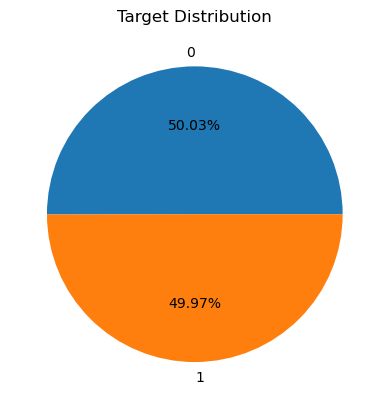

In [7]:
plt.pie(x=heart_df.cardio.value_counts().values,labels=heart_df.cardio.unique().tolist(),autopct='%1.2f%%')
plt.title('Target Distribution')
plt.show()

In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
heart_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print('Initial number of rows: ', heart_df.shape)
heart_df.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates: ', heart_df.shape)

Initial number of rows:  (70000, 13)
Number of rows after dropping duplicates:  (70000, 13)


<Axes: >

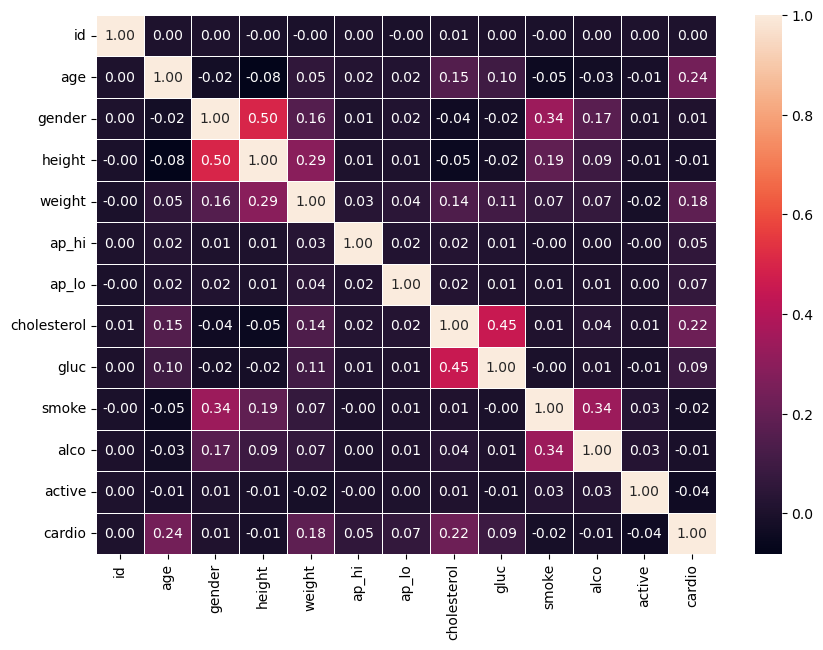

In [11]:
corr_matrix = heart_df.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

In [12]:
corr_matrix["cardio"].abs().nlargest(10)

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
active         0.035653
smoke          0.015486
height         0.010821
Name: cardio, dtype: float64

In [13]:
heart_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

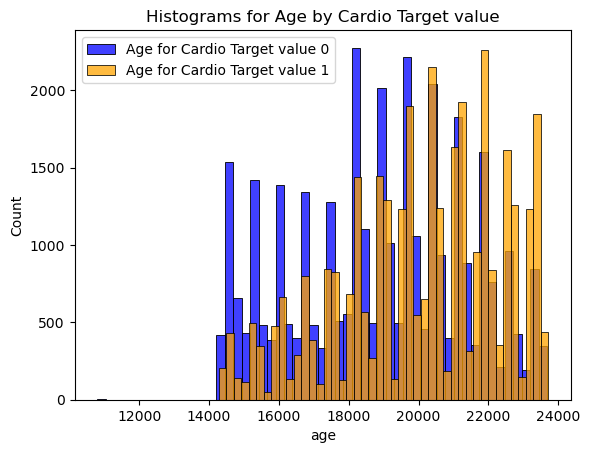

In [14]:
t0 = heart_df[heart_df.cardio==0]
t1 = heart_df[heart_df.cardio==1]

sns.histplot(t0.age,kde=False,color="blue", label="Age for Cardio Target value 0")
sns.histplot(t1.age,kde=False,color = "orange", label = "Age for Cardio Target value 1")
plt.title("Histograms for Age by Cardio Target value")
plt.legend()

<Axes: xlabel='cardio', ylabel='age'>

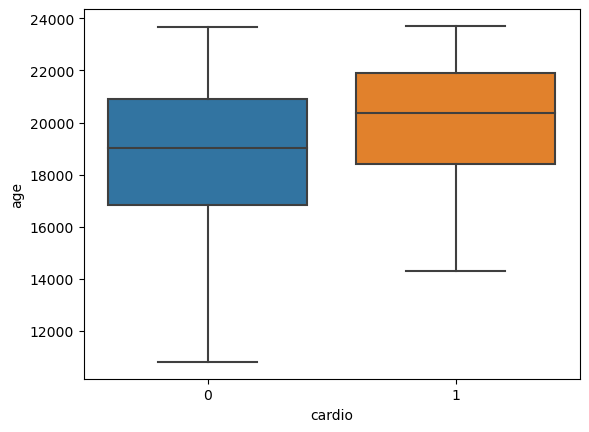

In [15]:
sns.boxplot(x='cardio', y='age', data=heart_df)

<Axes: xlabel='cardio', ylabel='age'>

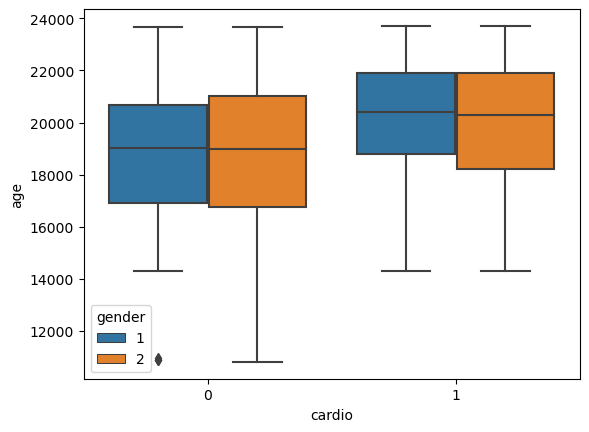

In [17]:
sns.boxplot(x='cardio', y='age', hue='gender', data=heart_df)

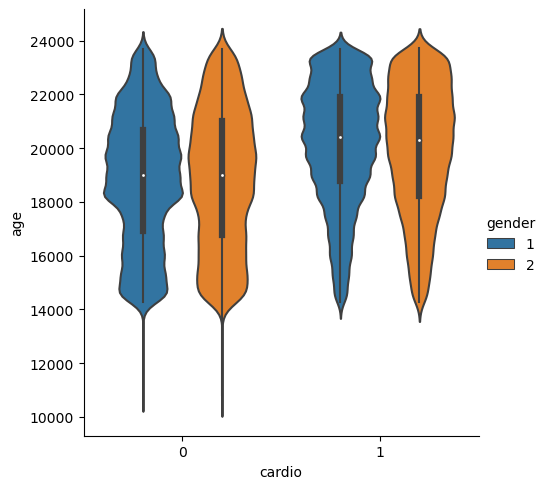

In [18]:
sns.catplot(x='cardio', y='age', hue='gender', kind='violin', data=heart_df)

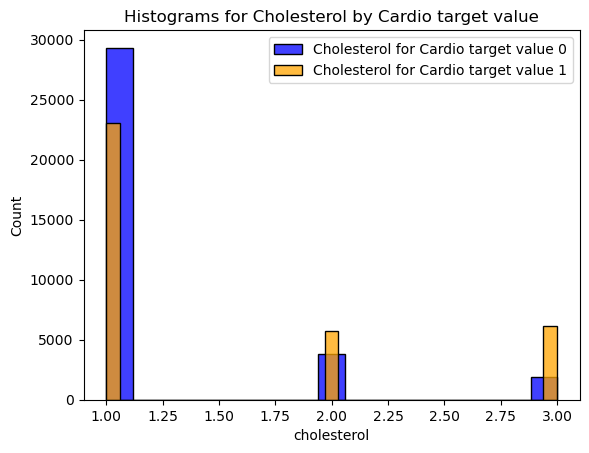

In [21]:
sns.histplot(t0.cholesterol,kde=False,color="blue", label="Cholesterol for Cardio target value 0")
sns.histplot(t1.cholesterol,kde=False,color = "orange", label = "Cholesterol for Cardio target value 1")
plt.title("Histograms for Cholesterol by Cardio target value")
plt.legend()

<Axes: xlabel='cardio', ylabel='cholesterol'>

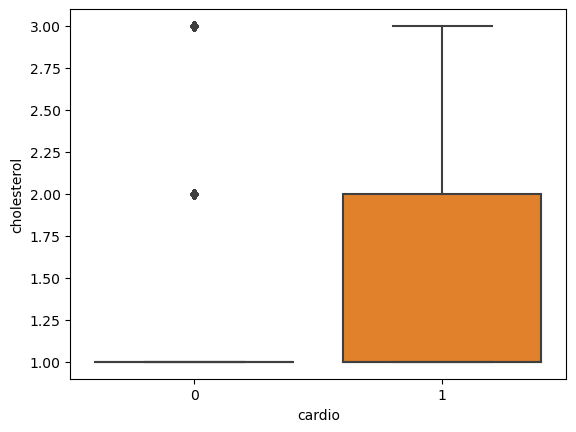

In [22]:
sns.boxplot(x='cardio', y='cholesterol', data=heart_df)

<Axes: xlabel='cardio', ylabel='weight'>

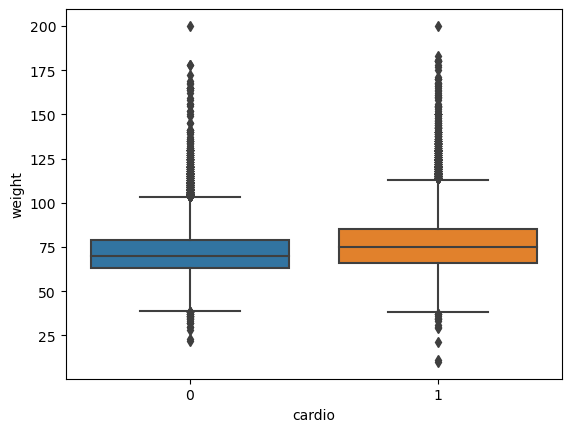

In [23]:
sns.boxplot(x='cardio', y='weight', data=heart_df)

<Axes: xlabel='cardio', ylabel='gluc'>

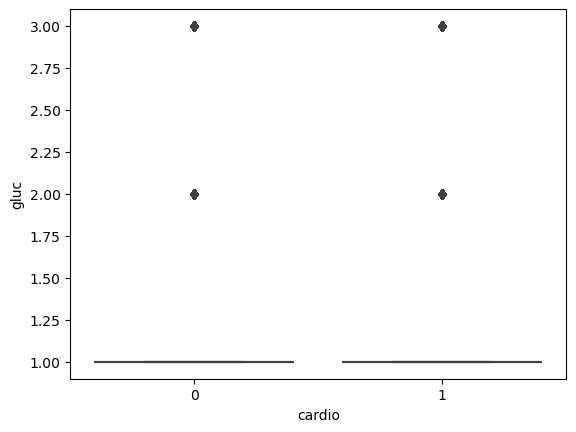

In [25]:
sns.boxplot(x='cardio', y='gluc', data=heart_df)

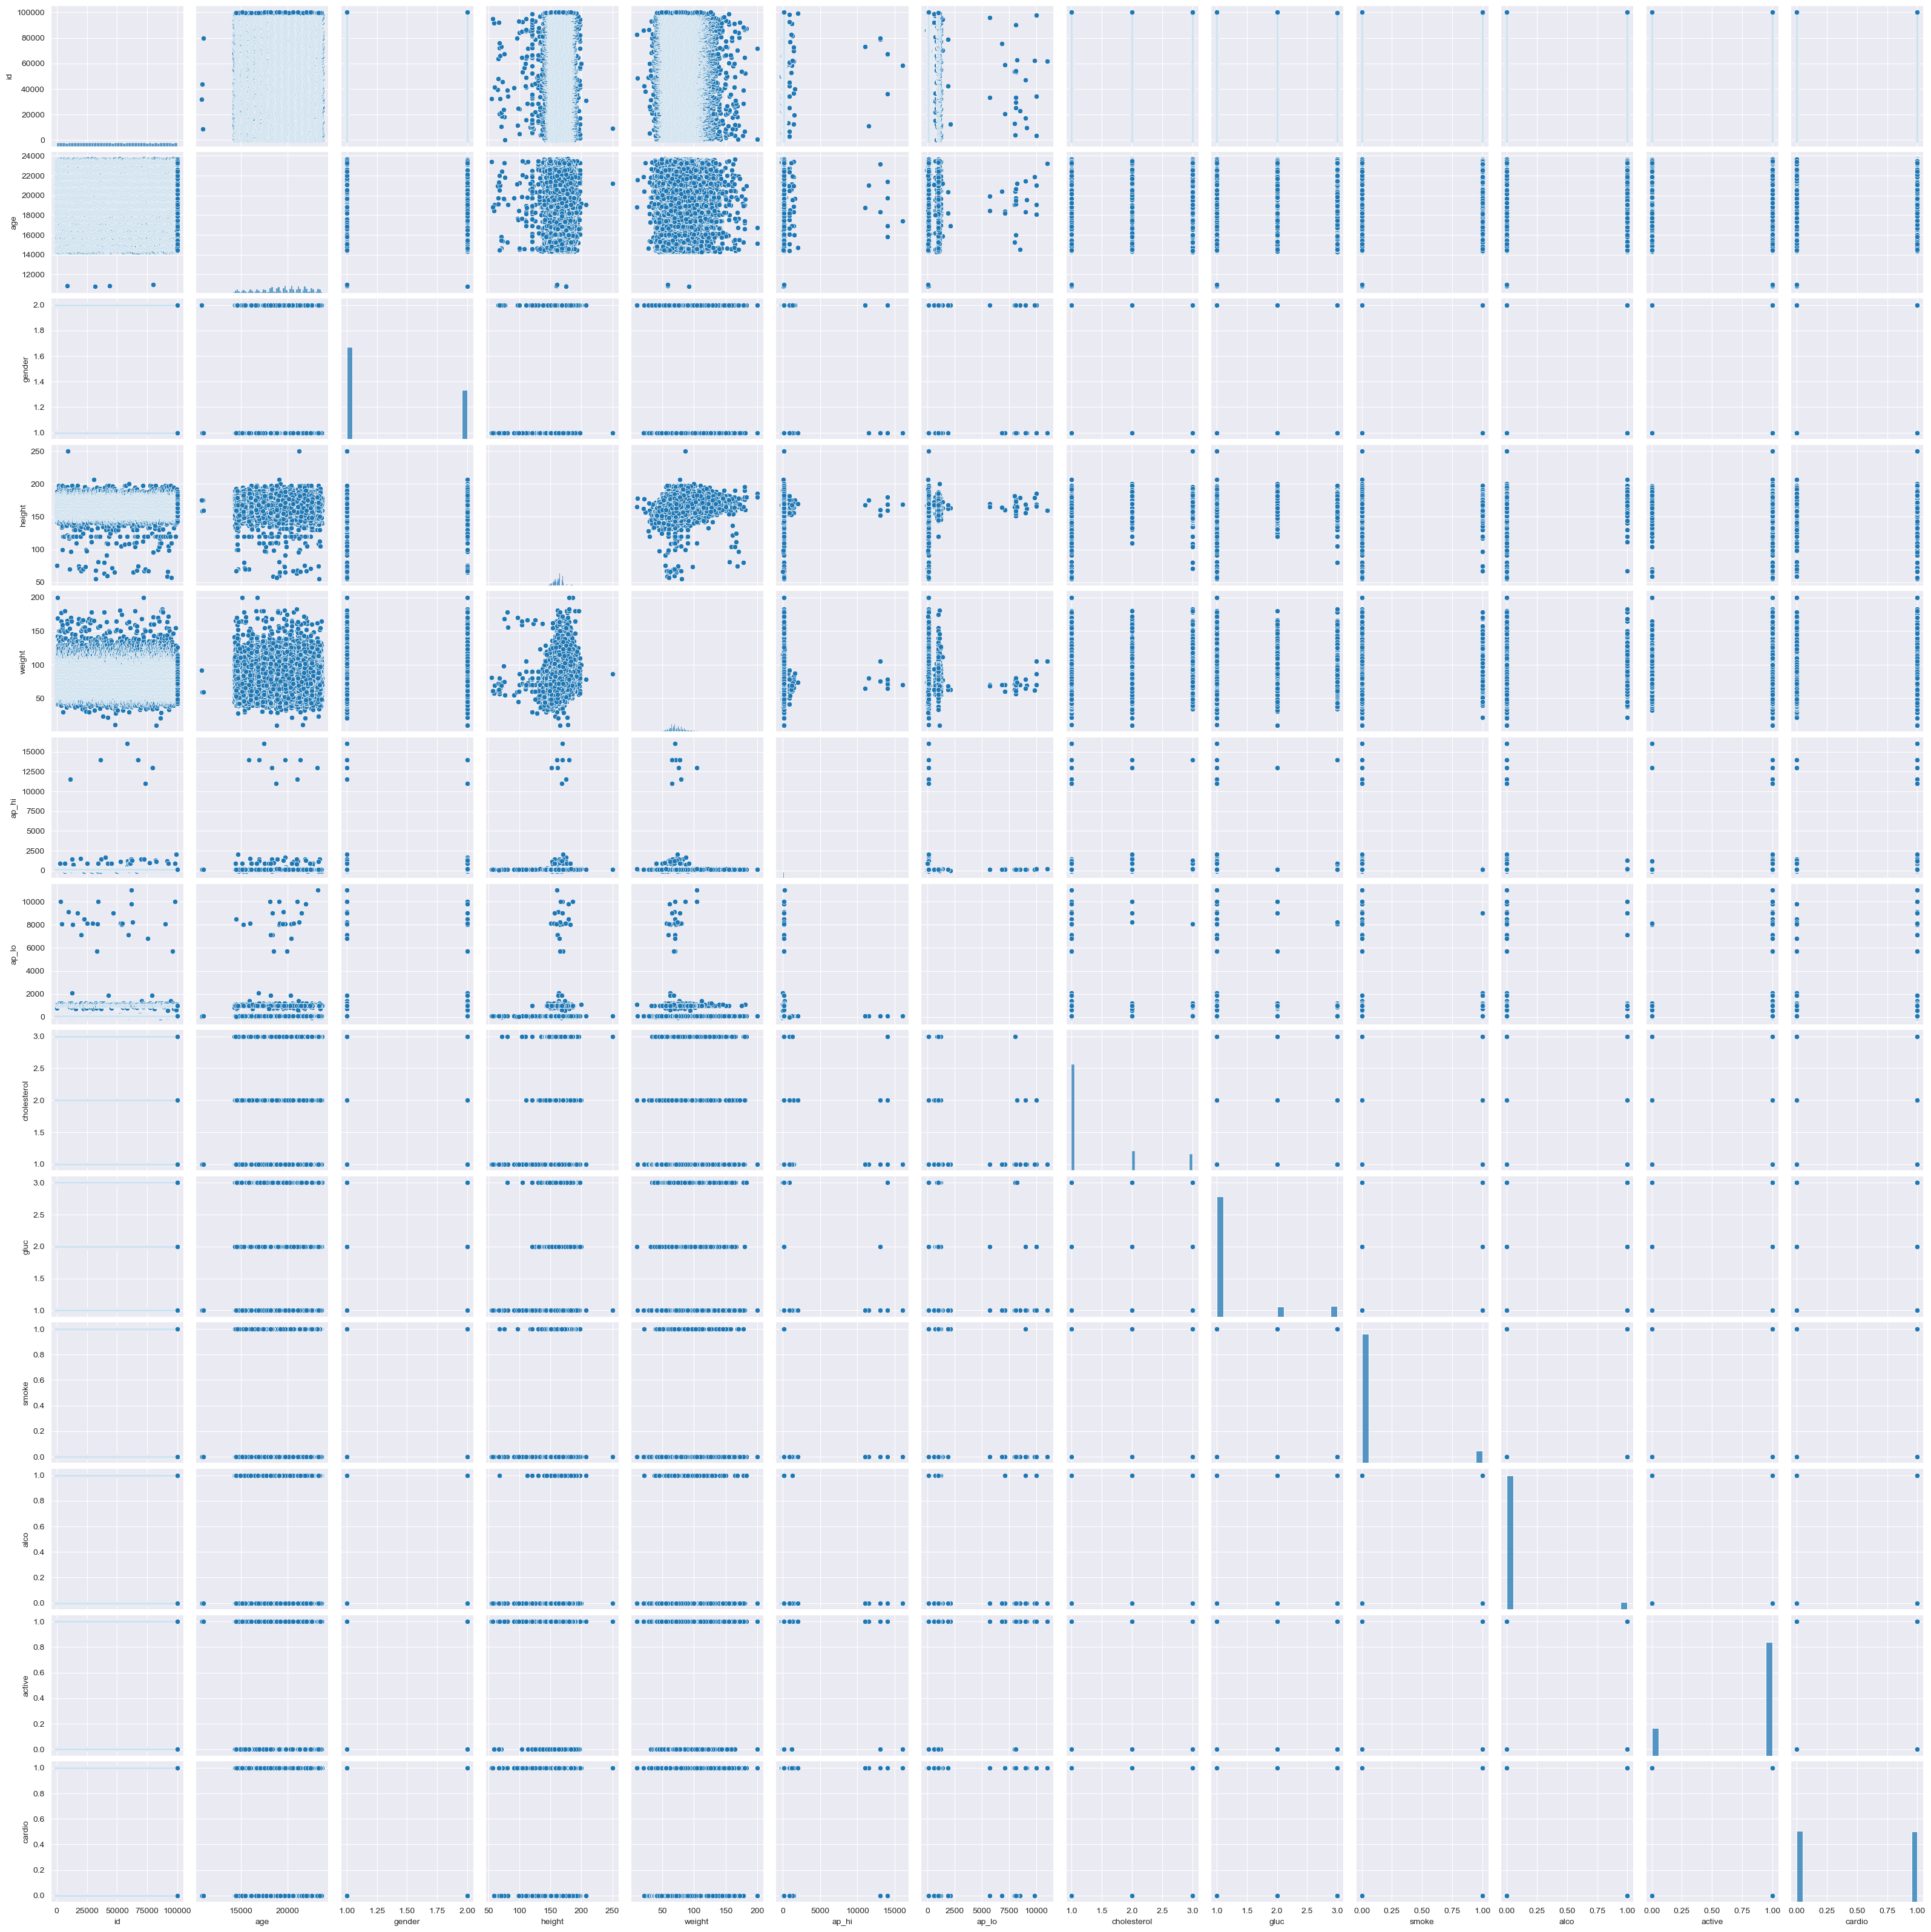

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(heart_df)

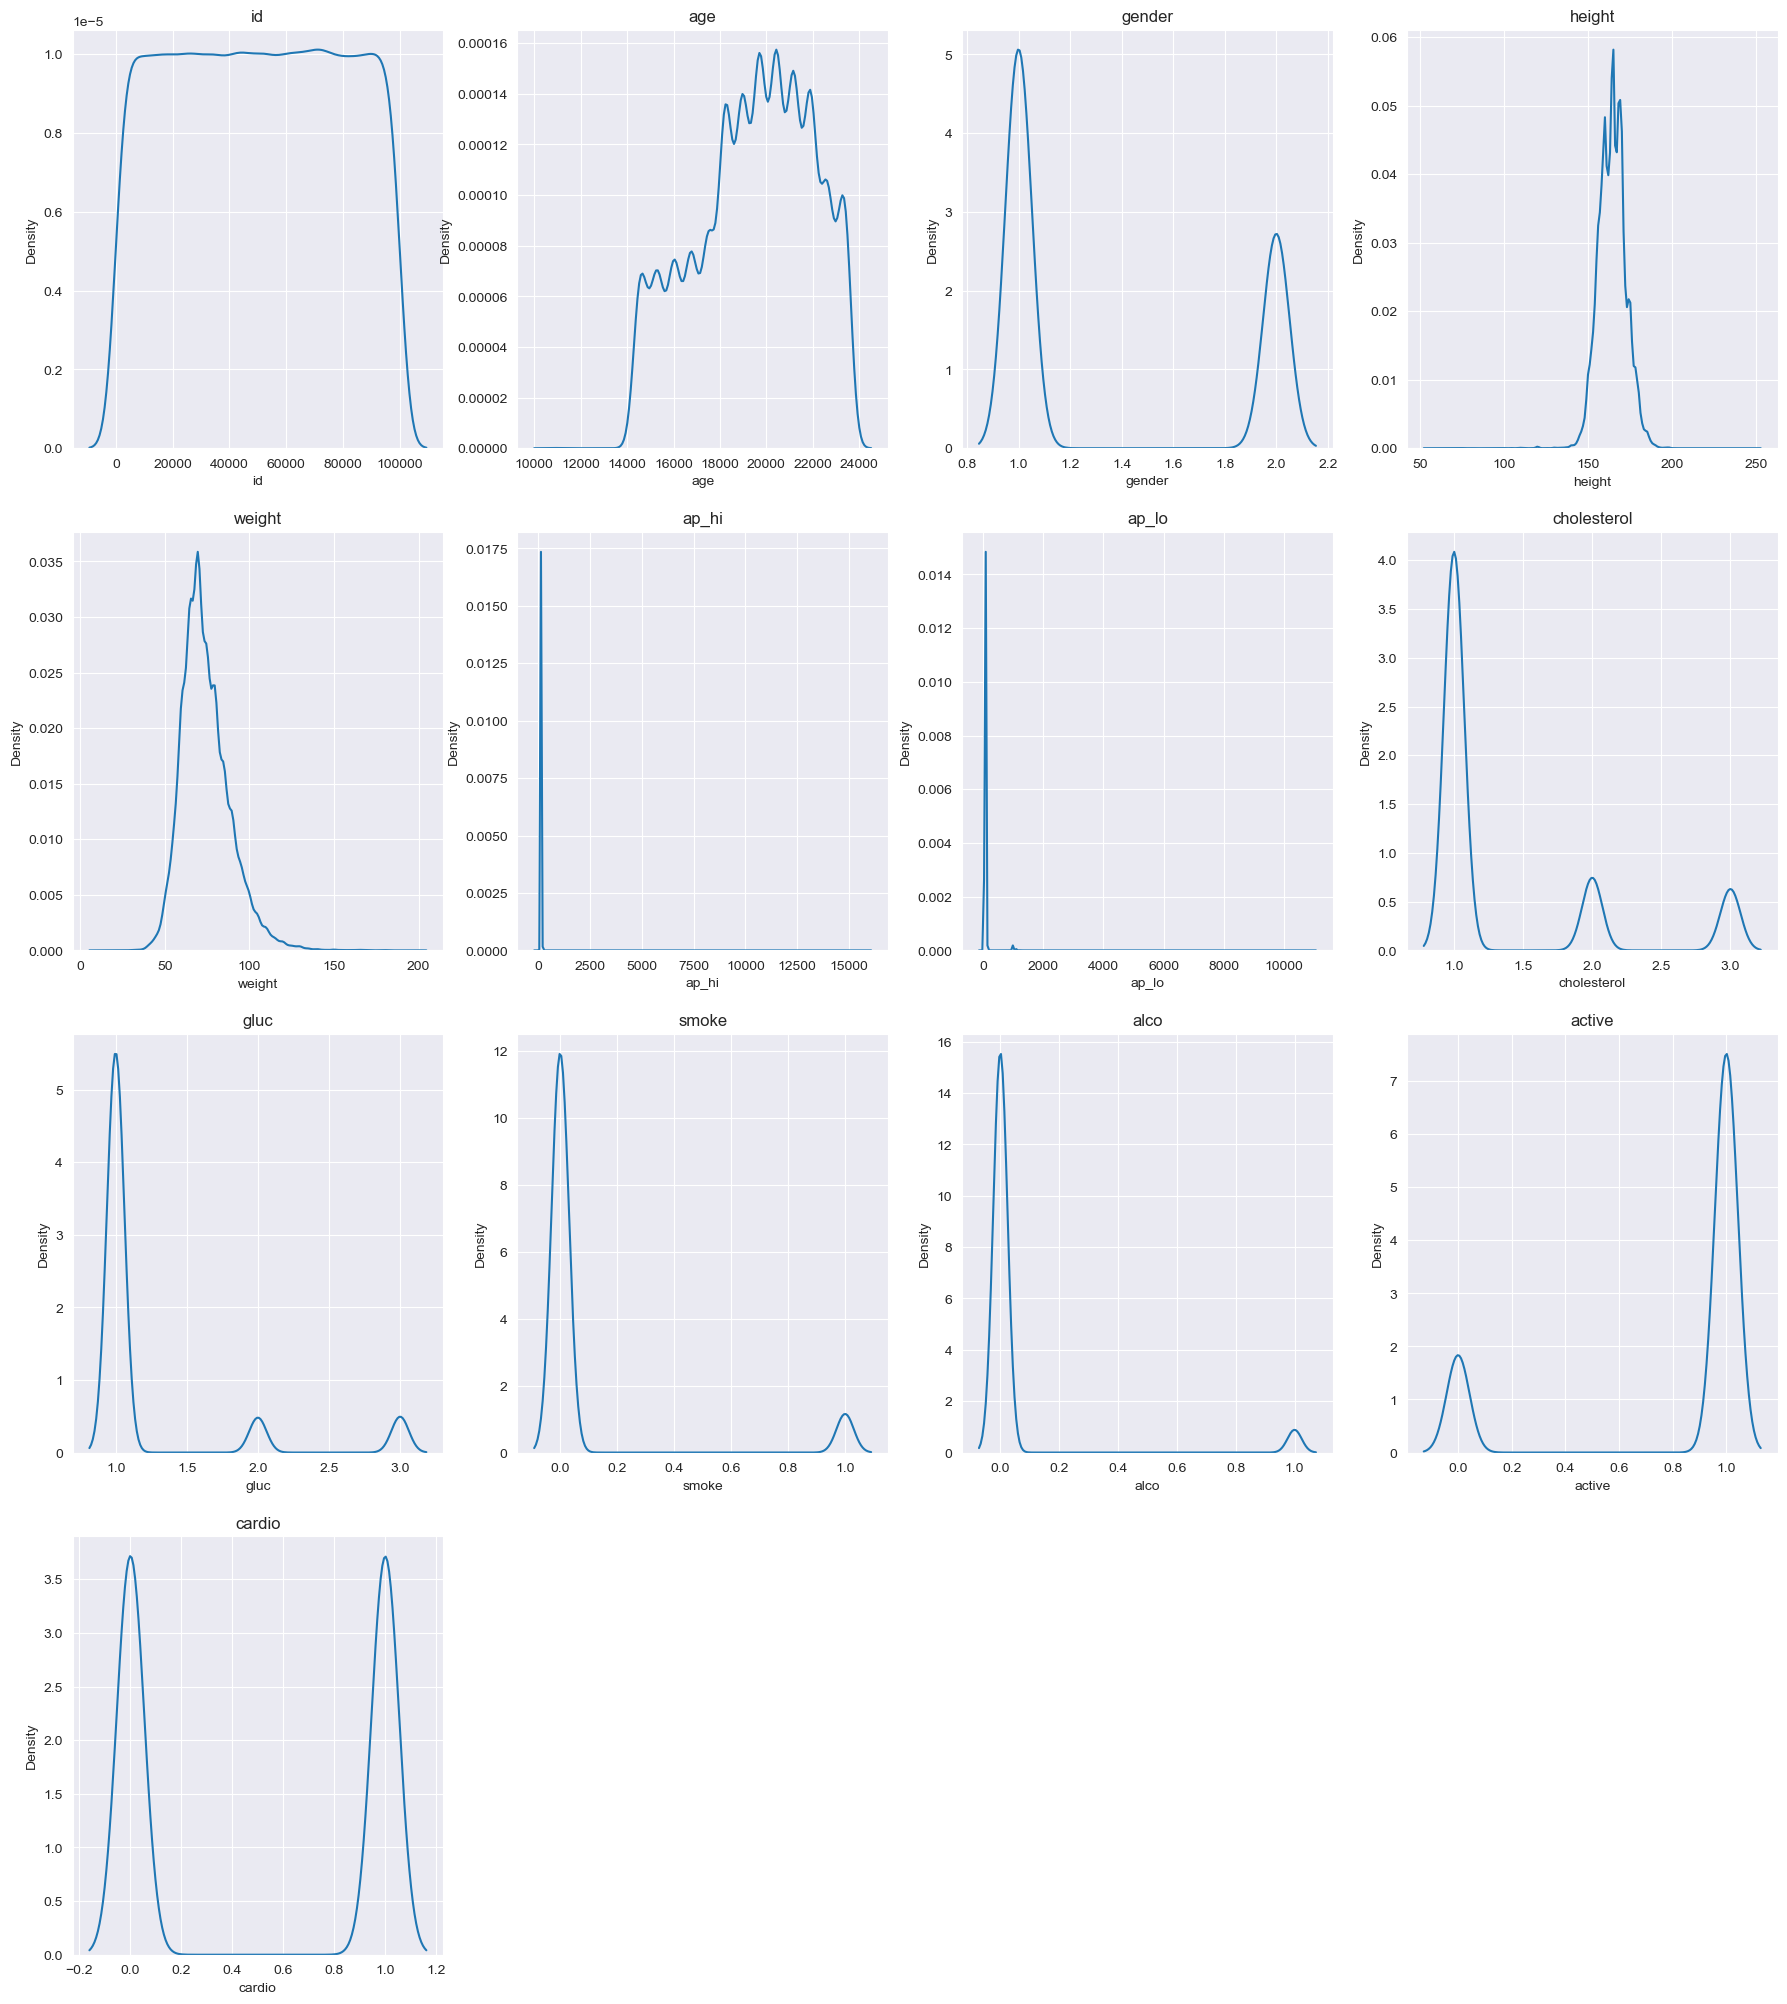

In [27]:
# EDA Univariante
column=heart_df.columns
plt.figure(figsize=(22,25))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    
    try:
        plt.title(col)
        sns.kdeplot(data=heart_df,x=col)
    except:
        plt.title(col)
        sns.countplot(data=heart_df,x=col)
plt.show()

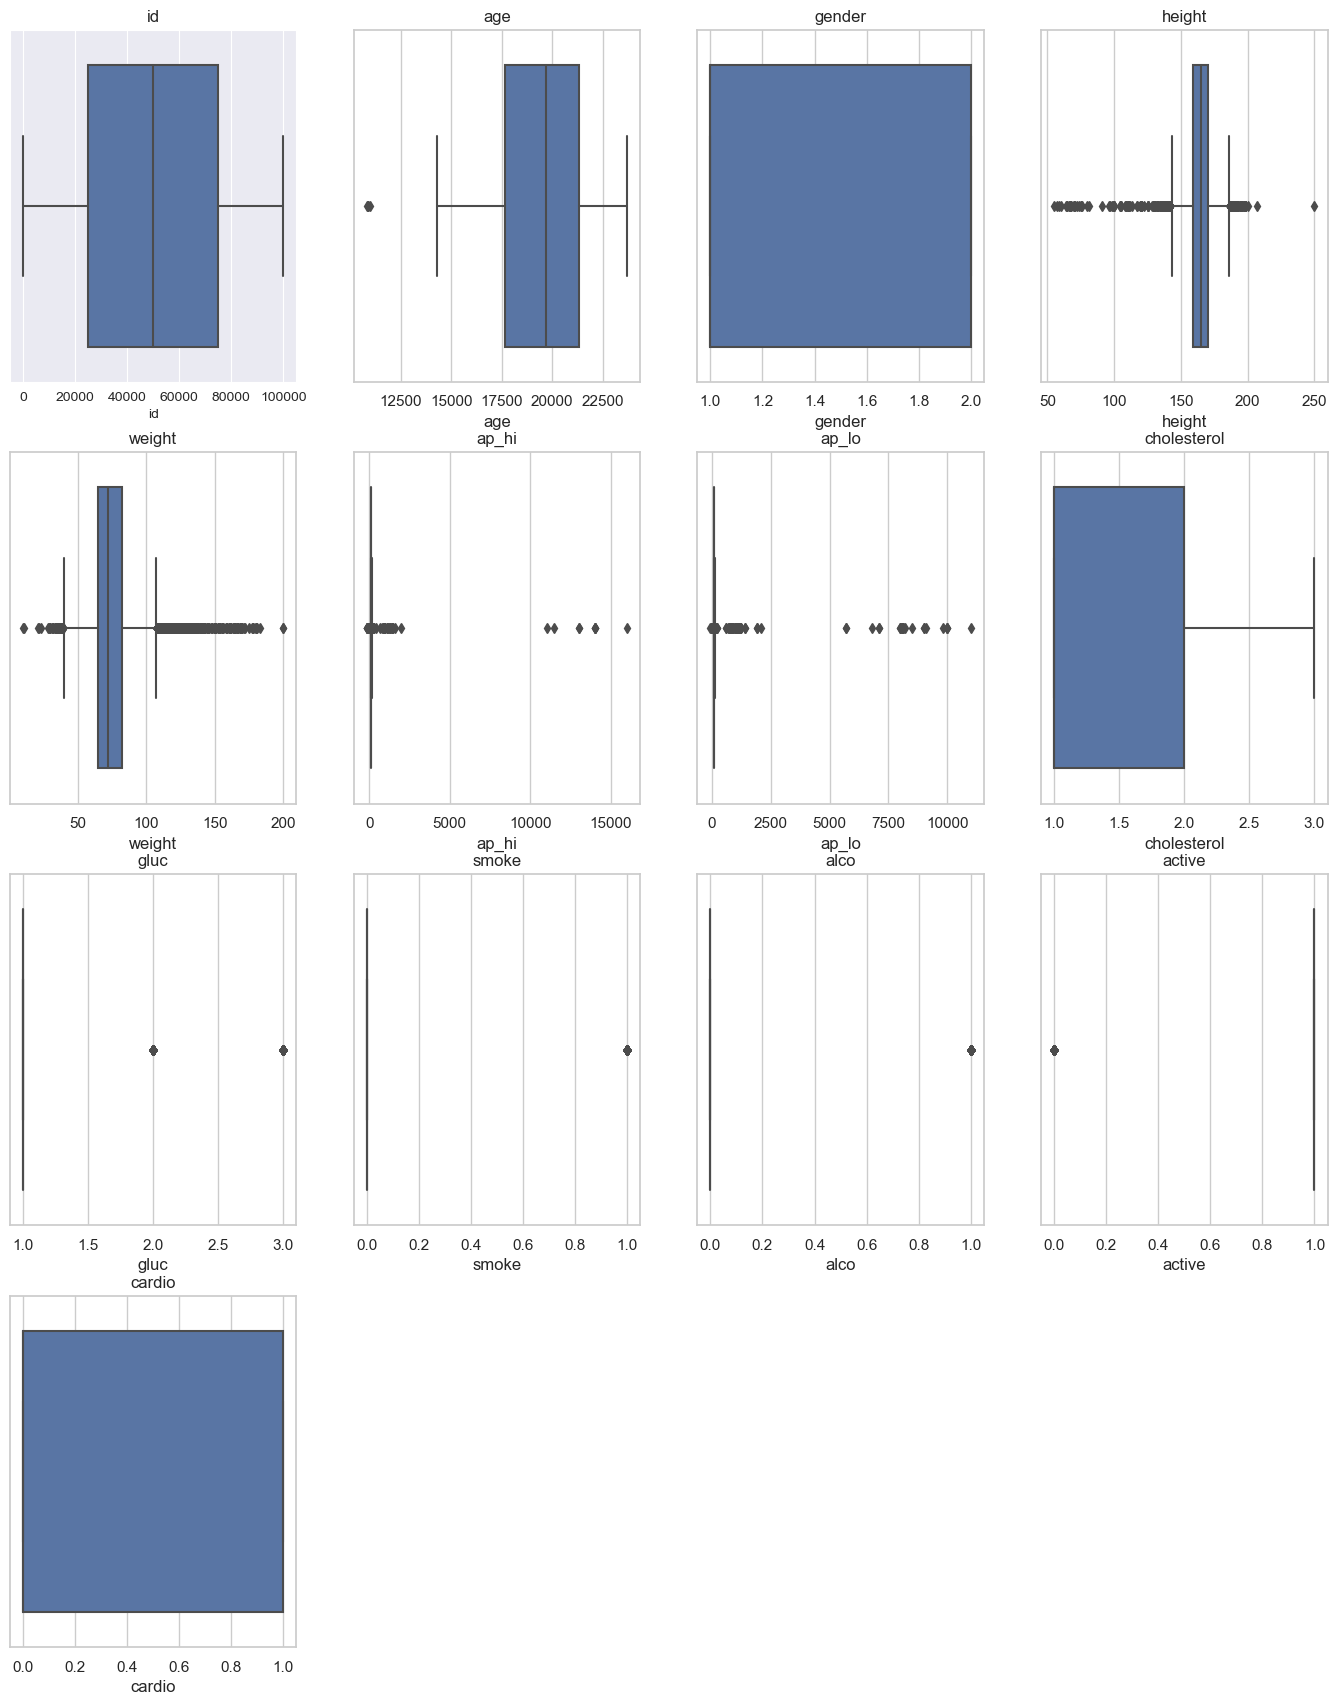

In [28]:
# check outliers
plt.figure(figsize=(17,21))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    sns.set_theme(style="whitegrid")
    
    try:
        plt.title(col)
        sns.boxplot(x=col,data=heart_df)
    except:
        plt.title(col)
        sns.boxplot(x=col,y='age',data=heart_df)
        
plt.show()

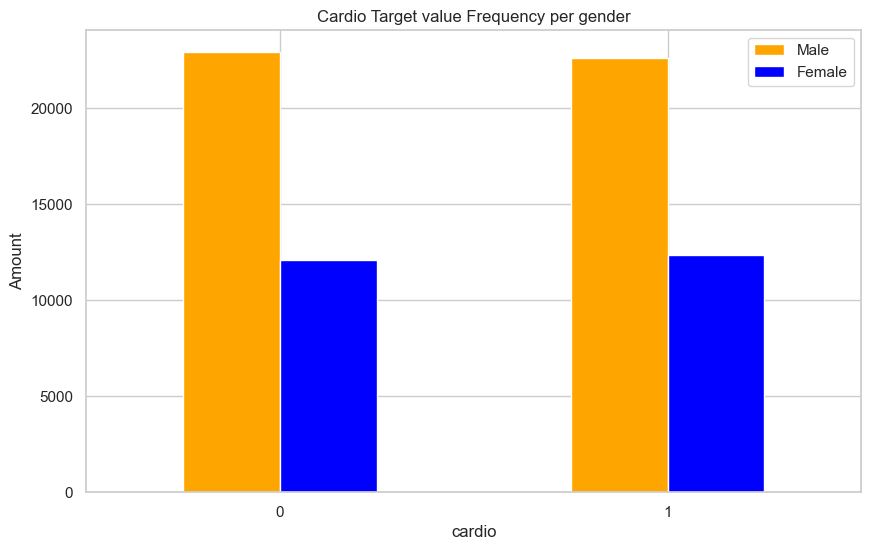

In [29]:
# Visualise relationship between sex and target column
pd.crosstab(heart_df.cardio, heart_df.gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["orange", "blue"])

# Add details
plt.title("Cardio Target value Frequency per gender")
plt.ylabel("Amount")
plt.legend(["Male", "Female"]);
plt.xticks(rotation=0);

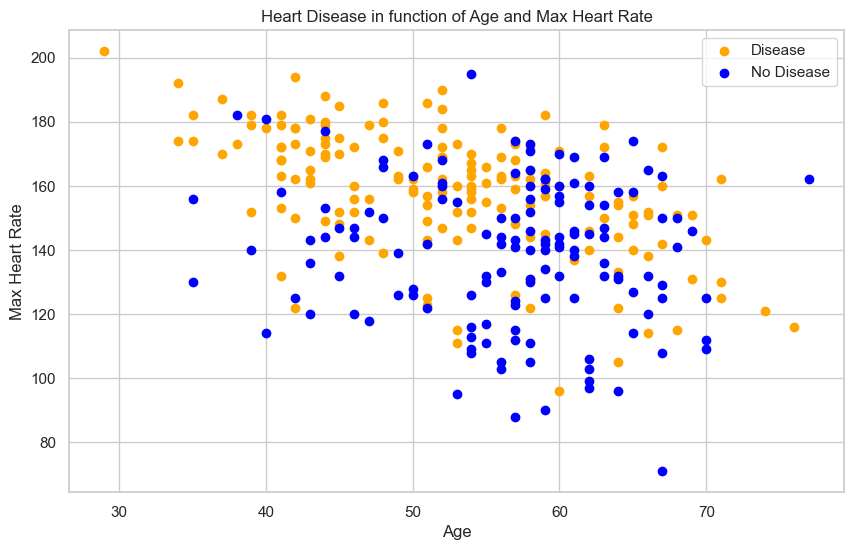

In [23]:
# Visualise Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10, 6))

# Scatter with heart disease samples
plt.scatter(heart_df.age[heart_df.target==1],
            heart_df.thalach[heart_df.target==1],
            c="orange")

# Scatter with non heart disease samples
plt.scatter(heart_df.age[heart_df.target==0],
            heart_df.thalach[heart_df.target==0],
            c="blue")

# Add details
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);